<a href="https://colab.research.google.com/github/kumardhruv88/deep_learning-projects/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab.patches import cv2_imshow
import cv2
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
type(x_train)

numpy.ndarray

In [6]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [8]:
x_train[23].shape

(28, 28)

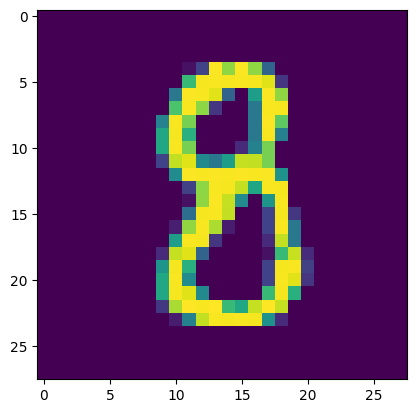

In [10]:
plt.imshow(x_train[1254])
plt.show()

In [11]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [12]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [13]:
np.unique(y_test)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [14]:
x_train=x_train/255
x_test=x_test/255

In [15]:
x_train[87]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [16]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8383 - loss: 0.5284
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9571 - loss: 0.1432
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9679 - loss: 0.1053
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9748 - loss: 0.0810
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9787 - loss: 0.0669
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9827 - loss: 0.0529
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9850 - loss: 0.0472
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9863 - loss: 0.0422
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9878 - loss: 0.0359
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9895 - loss: 0.0323


In [20]:
loss,accuracy=model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9674 - loss: 0.1125


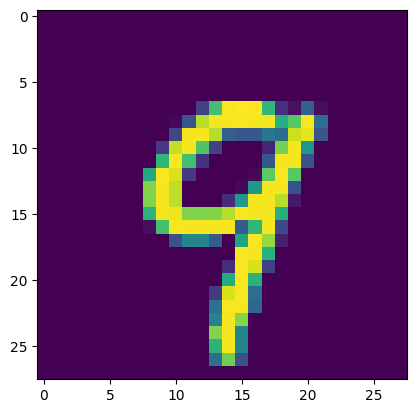

In [21]:
plt.imshow(x_test[12])
plt.show()

In [22]:
print(y_test [0])

7


In [23]:
y_pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [24]:
print(y_pred.shape)

(10000, 10)


In [25]:
print(y_pred[0])

[8.4595848e-04 3.7955500e-03 8.2513785e-01 8.5234034e-01 5.6852205e-06
 2.3458428e-03 7.6189242e-09 9.9999857e-01 2.6706164e-04 3.4046635e-01]


In [27]:
label_for_first_test_image = np.argmax(y_pred[0])
print(label_for_first_test_image)


7


In [29]:
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

In [30]:
conf_mat=confusion_matrix(y_test,y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 963    0    2    2    0    3    4    2    3    1]
 [   0 1122    1    3    0    1    2    1    5    0]
 [   1    4  987    8   11    1    2    5   13    0]
 [   0    0    2  987    1    6    0    4    7    3]
 [   0    0    1    1  956    1    4    3    0   16]
 [   1    0    0   11    1  870    2    0    6    1]
 [   3    3    2    1    5    4  931    2    7    0]
 [   0    5   14   12    0    1    0  982    6    8]
 [   0    0    4    4    5    8    1    4  946    2]
 [   0    2    0    7   11    9    1    5   10  964]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

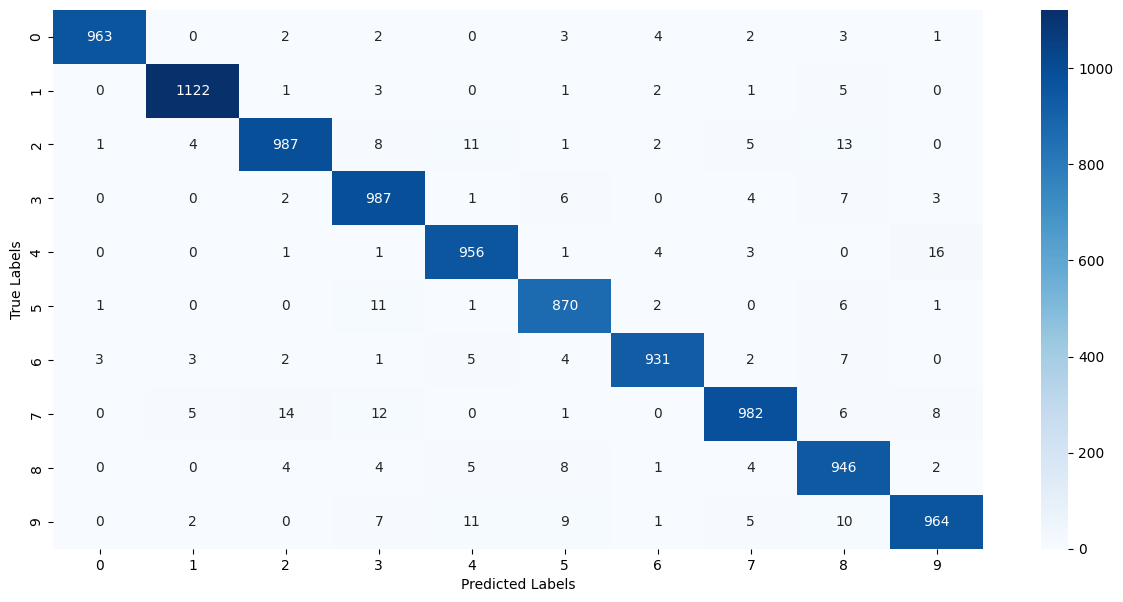

In [31]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [40]:

input = '/content/mnist.png'

input_image = cv2.imread(input)

In [41]:
type(input_image)

numpy.ndarray

In [42]:
print(input_image)

[[[250 250 250]
  [250 250 250]
  [198 198 198]
  ...
  [250 250 250]
  [255 255 255]
  [255 255 255]]

 [[250 250 250]
  [250 250 250]
  [198 198 198]
  ...
  [250 250 250]
  [255 255 255]
  [255 255 255]]

 [[198 198 198]
  [198 198 198]
  [  0   0   0]
  ...
  [198 198 198]
  [255 255 255]
  [255 255 255]]

 ...

 [[228 228 228]
  [228 228 228]
  [  0   0   0]
  ...
  [228 228 228]
  [255 255 255]
  [255 255 255]]

 [[221 221 221]
  [221 221 221]
  [  0   0   0]
  ...
  [221 221 221]
  [255 255 255]
  [255 255 255]]

 [[221 221 221]
  [221 221 221]
  [  0   0   0]
  ...
  [221 221 221]
  [255 255 255]
  [255 255 255]]]


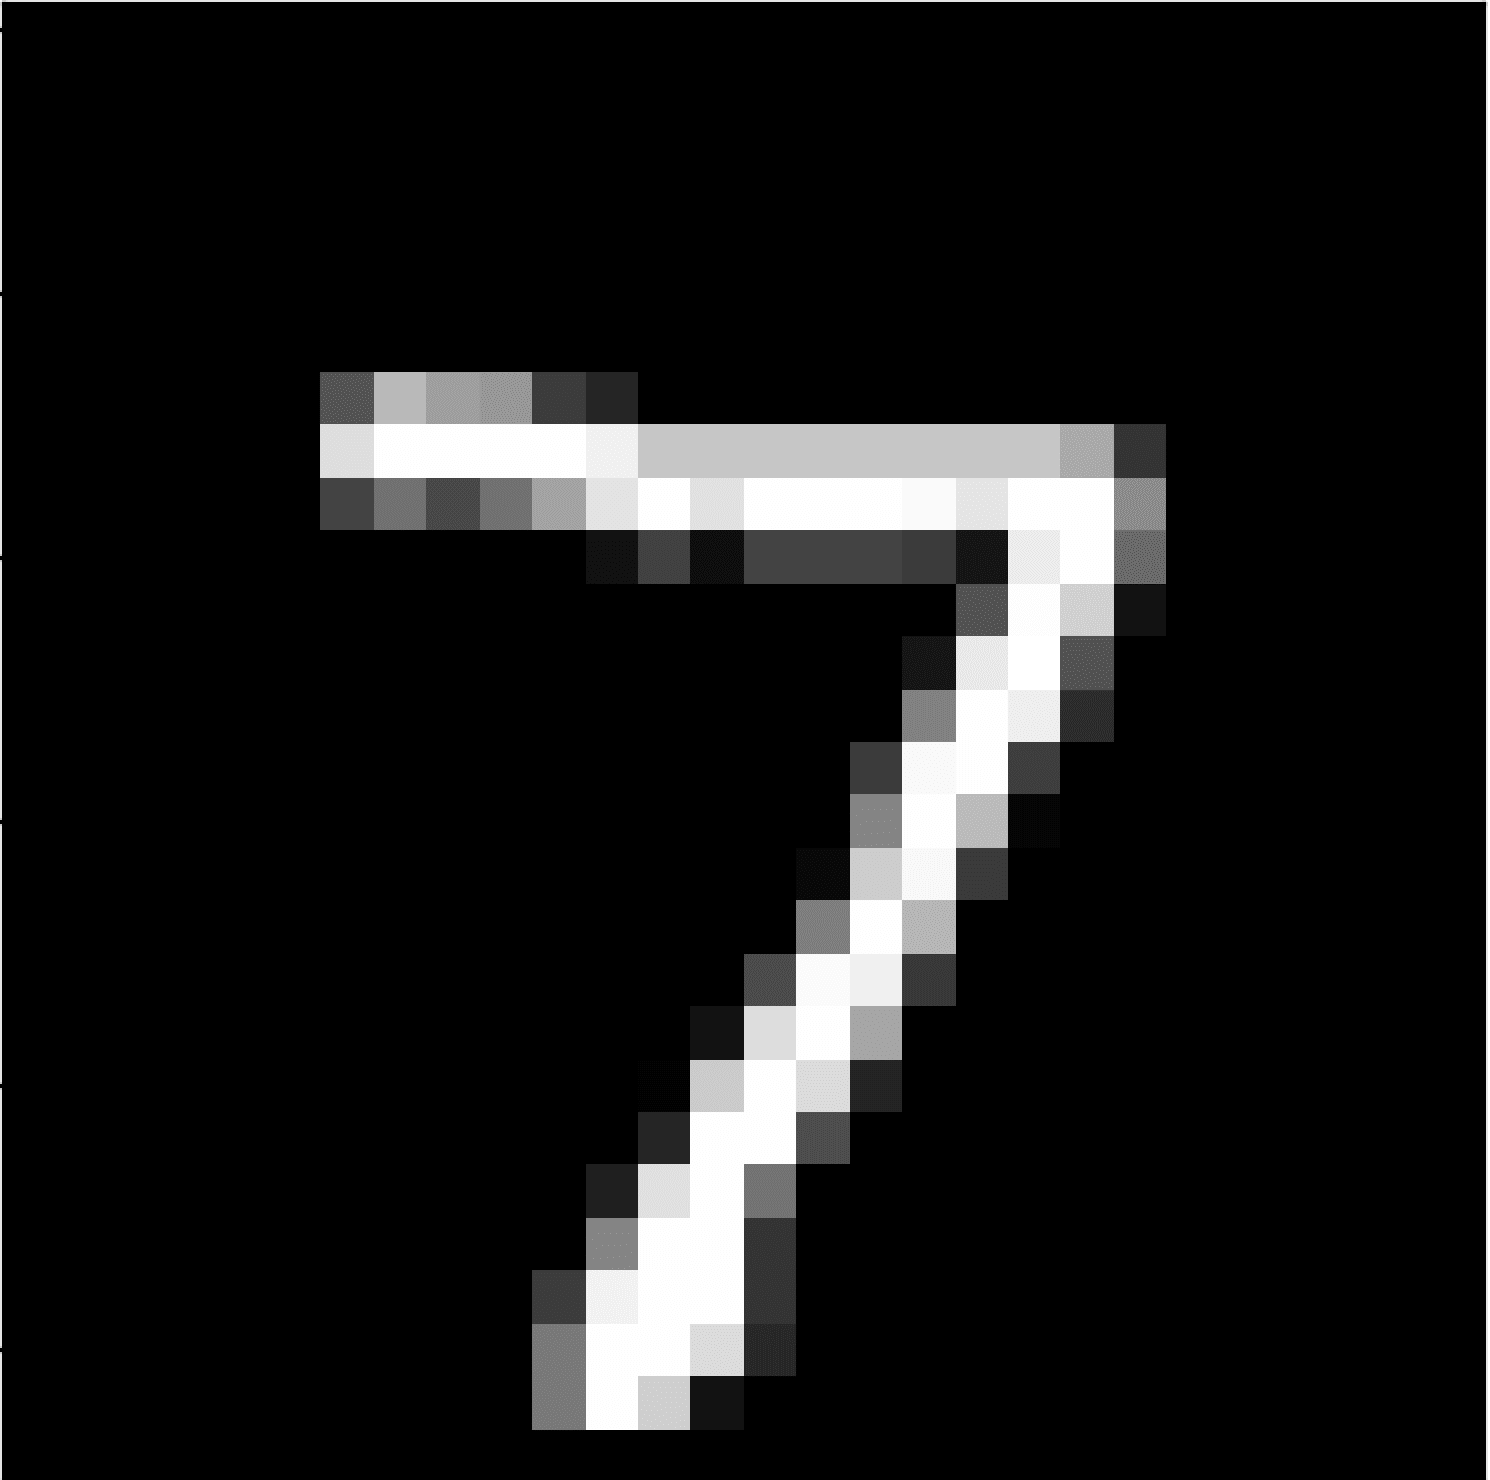

In [43]:
cv2_imshow(input_image)

In [44]:
input_image.shape

(1480, 1490, 3)

In [45]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)


In [46]:
grayscale.shape


(1480, 1490)

In [49]:
input_image_resize = cv2.resize(grayscale, (28, 28))
input_image_resize.shape

(28, 28)

In [50]:
cv2_imshow(input_image_resize)

In [51]:
input_image_resize = input_image_resize/255


In [52]:
type(input_image_resize)

numpy.ndarray

In [53]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])


In [55]:
image_reshaped.shape

(1, 28, 28)

In [57]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[8.3661702e-04 3.8114439e-03 8.2624280e-01 8.5366851e-01 5.8235337e-06
  2.3648243e-03 7.9795708e-09 9.9999857e-01 2.6084788e-04 3.3794013e-01]]


In [59]:
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

7


In [62]:
input_image_path = '/content/mnist.png '

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)


AttributeError: 'NoneType' object has no attribute 'clip'